This notebook is for training softmax regression, the code resides in **softmax_digits.py**. Algorithm is implemented in **softmax_example.py and nnbase.py**. nnbase can be adapted for variety of neural network types. 
Data is truncated mnist provided by Taras

In [21]:
#%load_ext autotime
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
time: 19.3 ms


In [25]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sns.set(color_codes=True)
plt.rcParams['savefig.dpi'] = 100

from IPython.display import display

for f in os.listdir('../input'):
    print(f.ljust(30) + str(round(os.path.getsize('../input/' + f) / 1000000, 2)) + 'MB')


import softmax_digits as softdg
from softmax_example import SoftmaxRegression

.DS_Store                     0.0MB
kaggle_set                    0.0MB
trunc_mnist                   0.0MB
time: 18 ms


In [26]:
# read and preprocess data, see softmax_digits.py
(X_train, y_train, X_dev, y_dev, X_test, y_test, X_fulltest) = softdg.get_data(num_train=4800, 
        num_dev=100, num_test=100)

X_train shape (4800, 400)
X_dev shape (100, 400)
X_test shape (100, 400)
time: 465 ms


In [39]:
# Here we try different batch size strategies
import random
nepoch = 5
sz = len(y_train)
print 'Training data size is', sz
N = nepoch * len(y_train)
k = 8 # minibatch size

random.seed(10)
def epoch_sch():
    for i in xrange(nepoch):
        for j in xrange(sz):
            yield j

def rand_sch():
    for i in xrange(N):
        yield random.randint(0, sz)

def rand_minibatch(n, k):
    # minibatch with size k
    for _ in xrange (n / k):
        ret = [np.random.randint(0, sz) for _ in xrange(k)] 
        yield ret
def fullbatch():
    for i in range(500):
        ret = range(sz)
        yield ret


Training data size is 4800
time: 21.2 ms


In [44]:
sr = SoftmaxRegression(wv=np.zeros_like(X_train), dims=(400, 10), alpha=0.0001, reg=0.01)
curve = sr.train_sgd(X_train, y_train, fullbatch(), costevery=100, devX=X_dev, devy=y_dev)
counts, costs, costdevs  = zip(*curve)

Begin SGD...
  Seen 0 in 0.00 s
  [0]: mean train loss 2.80495 mean valid loss 2.99463
  [100]: mean train loss 0.343305 mean valid loss 0.430629
  [200]: mean train loss 0.316471 mean valid loss 0.418299
  [300]: mean train loss 0.30804 mean valid loss 0.413734
  [400]: mean train loss 0.304806 mean valid loss 0.411313
  [500]: mean loss 0.303358
SGD complete: 500 examples in 117.80 seconds.
time: 1min 57s


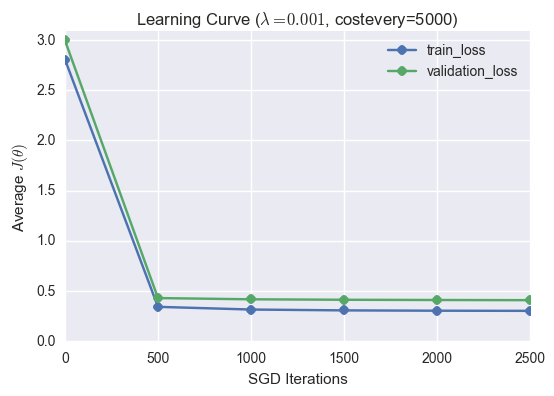

time: 363 ms


In [45]:
# plot train and dev errors
plt.figure(figsize=(6,4))

plt.plot(5*np.array(counts), costs, color='b', marker='o', linestyle='-', label=r"train_loss")
plt.plot(5*np.array(counts), costdevs, color='g', marker='o', linestyle='-', label=r"validation_loss")

plt.title(r"Learning Curve ($\lambda=0.001$, costevery=5000)")
plt.xlabel("SGD Iterations"); plt.ylabel(r"Average $J(\theta)$"); 
plt.ylim(ymin=0, ymax=max(1.1*max(costs),3*min(costs)));
plt.legend()
#plt.show()

In [46]:
accuracy_test = np.count_nonzero(sr.predict(X_test) == y_test) / float(len(y_test))
print 'accuracy on test', accuracy_test
accuracy_test = np.count_nonzero(sr.predict(X_train) == y_train) / float(len(y_train))
print 'accuracy on test', accuracy_test

accuracy on test 0.89
accuracy on test 0.951458333333
time: 125 ms
